# Figure 004 (v001)

Cell lines covariates of sex chromosomes and TP53 mutants.

## Setup

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import janitor  # noqa: F401
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
import speclet.plot as sp
from speclet.io import figure_img_file, tables_dir
from speclet.plot.color_pal import lineage_color_pal, sublineage_color_pal

In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sp.set_speclet_theme(sp.PlottingMode.DISSERTATION)

In [5]:
FIGNUM, VERSION = 4, 1
FIGURE_FILE = figure_img_file(FIGNUM, VERSION, "cell-tp53-sex-chrom")
FIGURE_FILE

PosixPath('/n/data1/hms/dbmi/park/Cook/speclet/figures/figure_004-v001/fig_004-v001_cell-tp53-sex-chrom.png')

In [6]:
notebook_output_dir = tables_dir() / "100_106_molecular-cellular-covariates"

### Data

In [7]:
# cell_effects = pd.read_csv(notebook_output_dir / "cell-effects.csv")
# chrom_effects = pd.read_csv(notebook_output_dir / "chromosome-effects.csv")
sublineage_pal = sublineage_color_pal()
lineage_pal = lineage_color_pal()

In [8]:
x_chrom_diff = pd.read_csv(notebook_output_dir / "X-chrom-difference-draws.csv")
sex_data = pd.read_csv(notebook_output_dir / "cell-line-sexes.csv")
tp53_diff = pd.read_csv(notebook_output_dir / "tp53-difference-draws.csv")
tp53_data = pd.read_csv(notebook_output_dir / "tp53-mutation-data.csv")

## Figure

In [10]:
def _plot_comparison_distributions(df: pd.DataFrame, axes: plt.Axes) -> None:
    ax = axes[0]
    ax.axvline(0, c="k", lw=0.5, zorder=1)
    sns.boxplot(
        data=df,
        y="variable",
        x="value",
        hue="variable",
        linewidth=0.5,
        width=0.8,
        dodge=False,
        ax=ax,
        showfliers=False,
        zorder=20,
        boxprops={"zorder": 20},
    )
    ax.set_xlabel(None)
    ax.get_legend().remove()

    ax = axes[1]
    ax.axvline(0, c="k", lw=0.5, zorder=1)
    sns.boxplot(
        data=df,
        y="lineage_subtype",
        x="value",
        hue="variable",
        linewidth=0.5,
        width=0.8,
        ax=ax,
        showfliers=False,
        zorder=20,
        boxprops={"zorder": 20},
    )
    ax.get_legend().remove()

Text(0.68, 0.985, 'b')

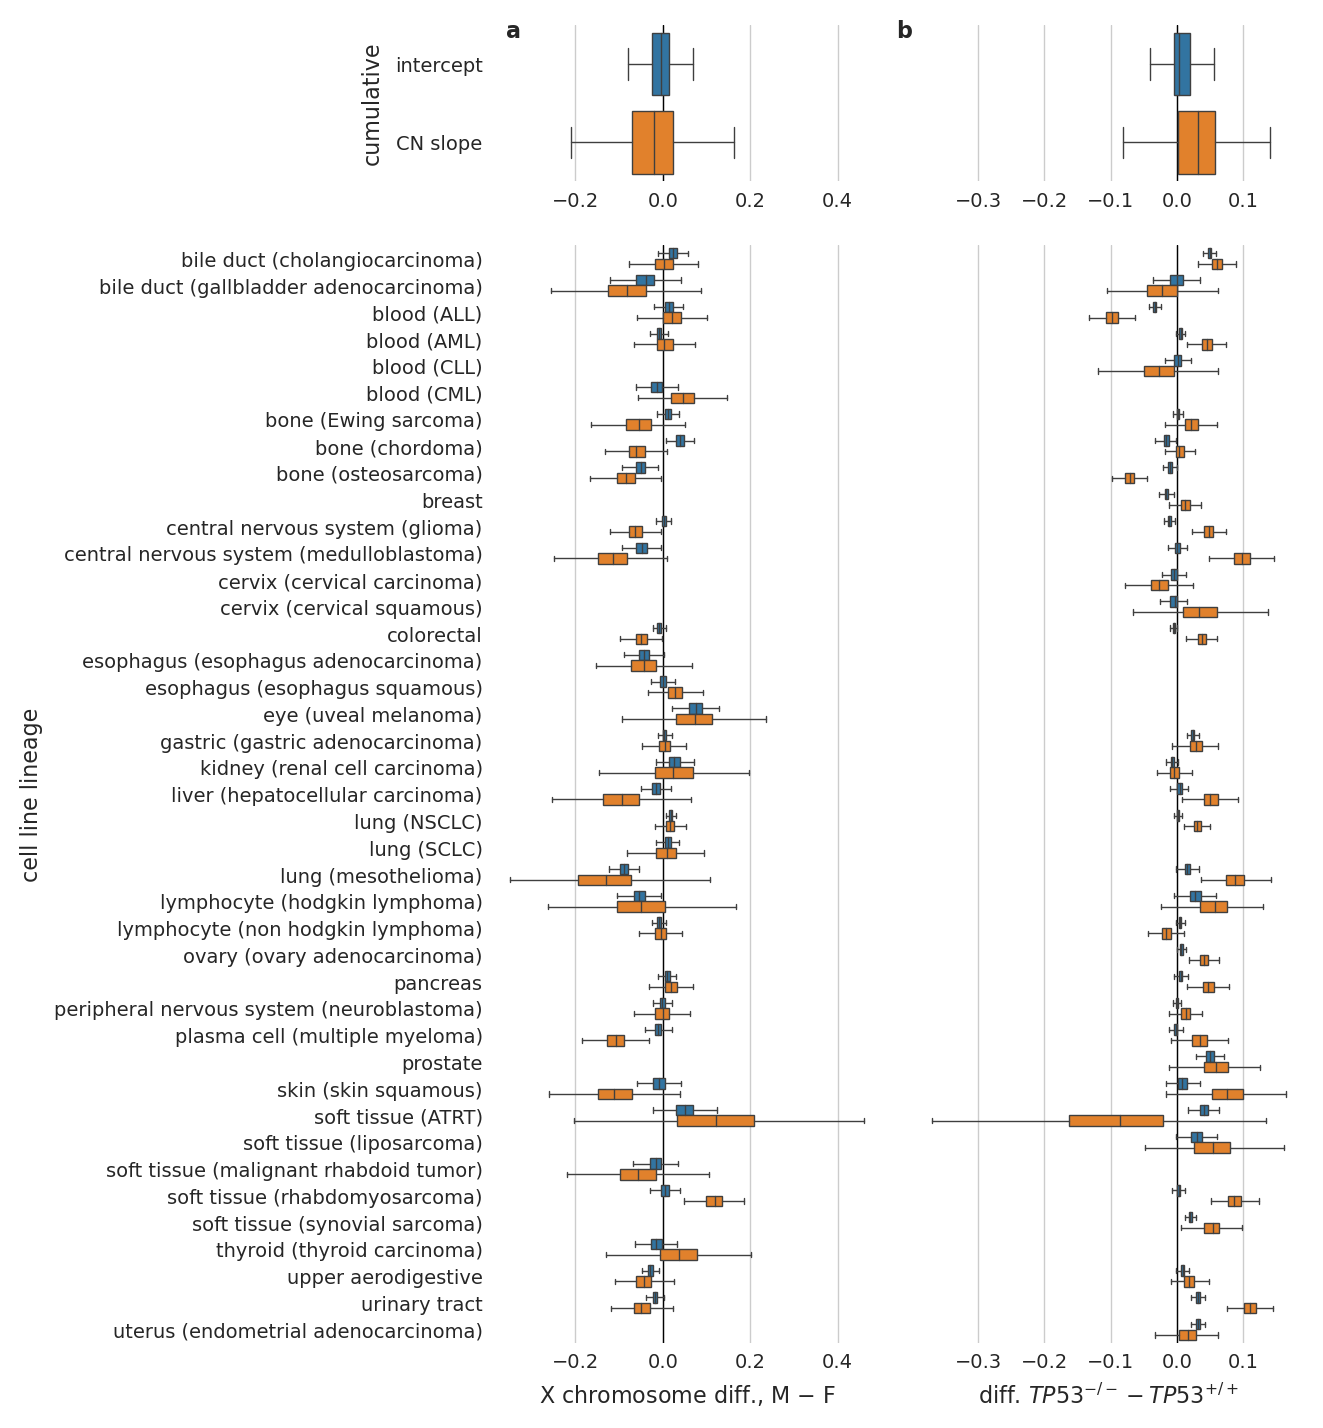

In [34]:
FIGSIZE = (6.5, 7)
figure = plt.figure(constrained_layout=True, figsize=FIGSIZE)
gs = figure.add_gridspec(
    2, 2, width_ratios=(1, 1), height_ratios=(1, 7), hspace=0.05, wspace=0.05
)
Xchrom_top_ax = figure.add_subplot(gs[0, 0])
Xchrom_bot_ax = figure.add_subplot(gs[1, 0], sharex=Xchrom_top_ax)
tp53_top_ax = figure.add_subplot(gs[0, 1], sharey=Xchrom_top_ax)
tp53_bot_ax = figure.add_subplot(gs[1, 1], sharex=tp53_top_ax, sharey=Xchrom_bot_ax)

all_subtypes = list(
    x_chrom_diff["lineage_subtype"].toset().union(tp53_diff["lineage_subtype"].toset())
)
all_subtypes.sort()


plot_df = (
    x_chrom_diff.groupby("lineage_subtype")
    .apply(lambda df: df.sample(n=1000, random_state=12))
    .reset_index(drop=True)
    .pivot_longer(["lineage_subtype"], ["k", "m"])
    .assign(
        lineage_subtype=lambda d: pd.Categorical(
            d["lineage_subtype"], categories=all_subtypes
        )
    )
)
_plot_comparison_distributions(plot_df, [Xchrom_top_ax, Xchrom_bot_ax])


plot_df = (
    tp53_diff.groupby("lineage_subtype")
    .apply(lambda df: df.sample(n=1000, random_state=12))
    .reset_index(drop=True)
    .pivot_longer(["lineage_subtype"], ["mu_k", "mu_m"])
    .assign(
        lineage_subtype=lambda d: pd.Categorical(
            d["lineage_subtype"], categories=all_subtypes
        )
    )
)
_plot_comparison_distributions(plot_df, [tp53_top_ax, tp53_bot_ax])

Xchrom_top_ax.set_ylabel("cumulative")
Xchrom_top_ax.set_yticklabels(["intercept", "CN slope"])
Xchrom_bot_ax.set_ylabel("cell line lineage")
Xchrom_bot_ax.set_xlabel("X chromosome diff., M $-$ F")
tp53_bot_ax.set_xlabel("diff. $TP53^{-/-} - TP53^{+/+}$")
tp53_bot_ax.tick_params("y", labelleft=False)
tp53_top_ax.tick_params("y", labelleft=False)
tp53_bot_ax.set_ylabel(None)
tp53_top_ax.set_ylabel(None)

figure.text(0.38, 0.985, "a", fontsize=8, fontweight="bold")
figure.text(0.68, 0.985, "b", fontsize=8, fontweight="bold")

## Saving

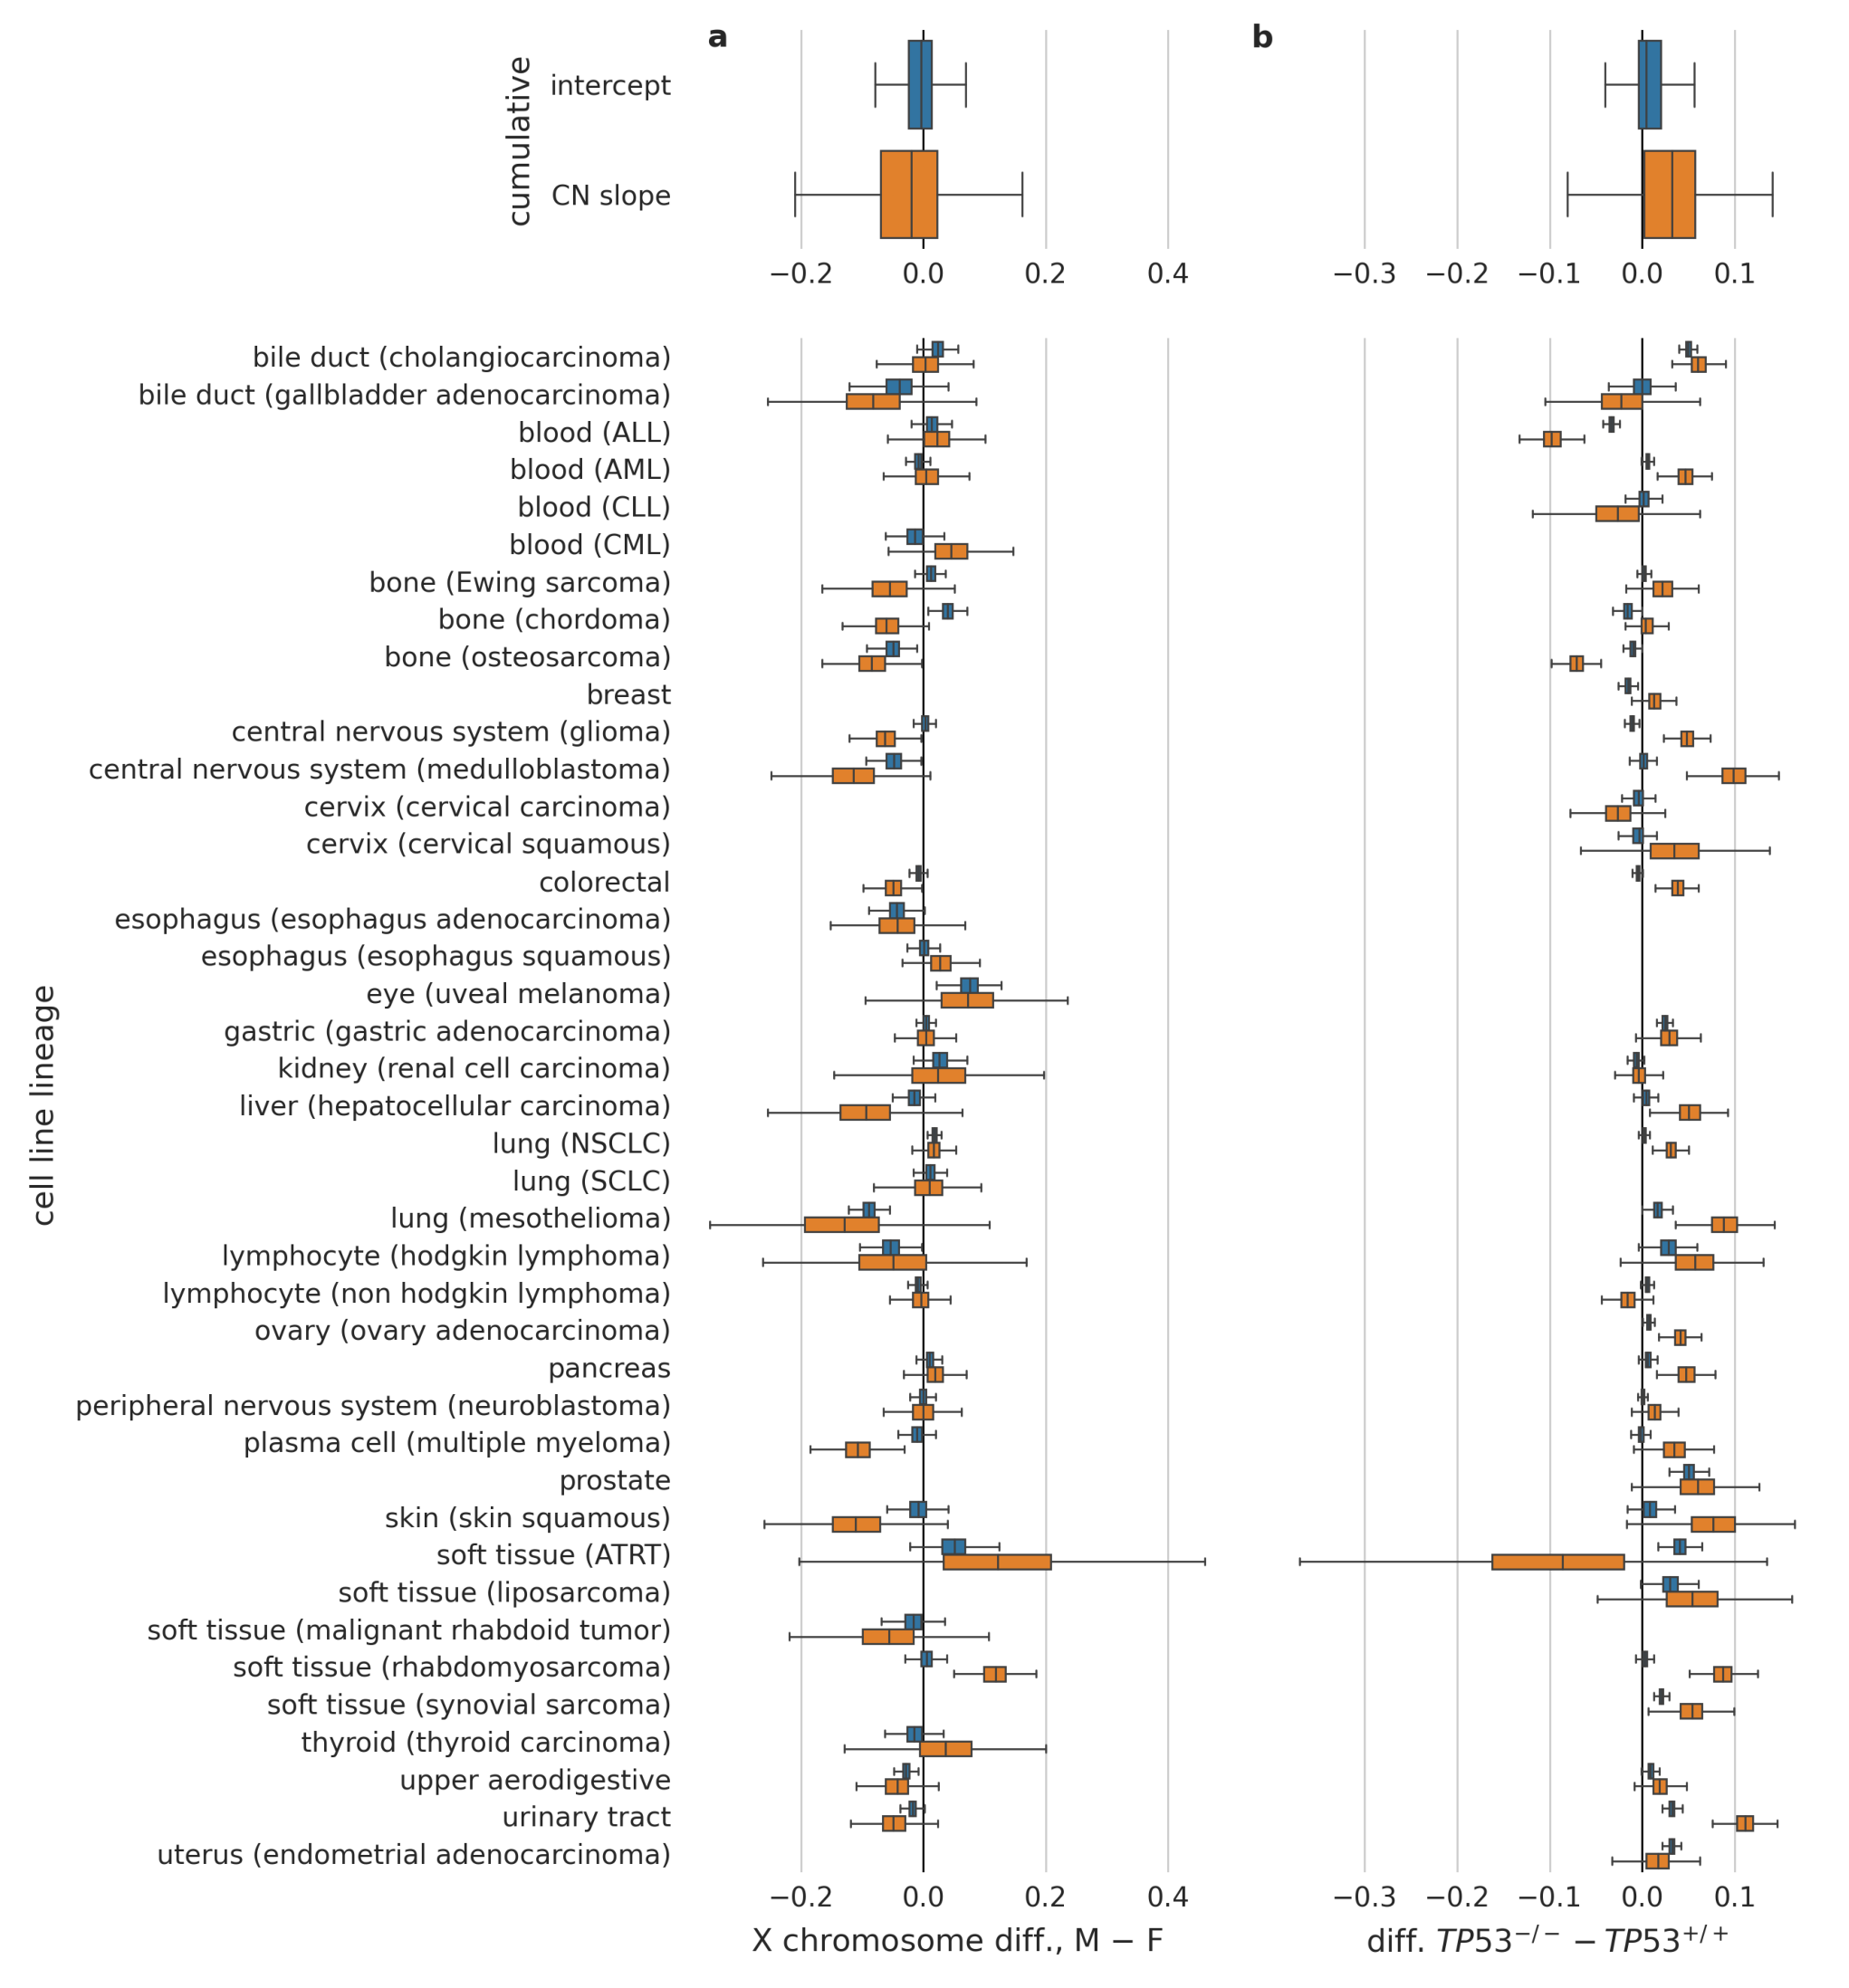

In [35]:
figure.savefig(FIGURE_FILE, dpi=400, pad_inches=0)

_, ax = plt.subplots(figsize=[x * 2 for x in FIGSIZE])
ax.imshow(plt.imread(FIGURE_FILE))
ax.axis("off")
plt.show()

---

## Session Info

In [13]:
%load_ext watermark
%watermark -d -u -v -iv -b -h -m

Last updated: 2022-09-23

Python implementation: CPython
Python version       : 3.10.6
IPython version      : 8.5.0

Compiler    : GCC 10.4.0
OS          : Linux
Release     : 3.10.0-1160.76.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 28
Architecture: 64bit

Hostname: compute-e-16-233.o2.rc.hms.harvard.edu

Git branch: figures

janitor   : 0.22.0
numpy     : 1.23.3
json      : 2.0.9
seaborn   : 0.11.2
matplotlib: 3.5.3
speclet   : 0.0.9000
pandas    : 1.4.4

